<span style="color:red; font-size:200%;">Ptojet 2: Analysez des données de systèmes éducatifs</span>

# Problématique

### Academy
 Une start-up spécialisée dans la technologie éducative, offre des formations conçues pour les étudiants de lycée et d'université en ligne. Récemment, l'entreprise a dévoilé ses ambitions d'expansion à l'échelle internationale.
### Objectif de projet
 Déterminer quels pays présentent un fort potentiel de clients pour les services d'Academy, et de comprendre comment ce potentiel pourrait évoluer dans le temps en utilisant l'analyse des données.
### Sources des données
 La banque mondiale: [https://datacatalog.worldbank.org/search/dataset/0038480](URL)

### Tâches principales
 Tant que Data Scientist dansl'entreprise mon rôle consiste une première mission d'analyse exploratoire:  
         &emsp;+ Présenter les caractéristiques du jeu de données.  
         &emsp;+ Procéder à une vérification approfondie de la qualité de ce jeu de données, en examinant notamment la présence                 de données manquantes, de doublons.  
         &emsp;+ Choisir les données pertinentes en vue de résoudre la problématique (indicateurs,années,pays etc.).  
         &emsp;+ Établir les indicateurs statistiques usuels (moyenne, médiane, écart-type) pour différentes régions géographiques et pays du monde.  

## caractéristiques du jeu de données
### &emsp; Import des bibliothèques

In [208]:
#conda update jupyter

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler

import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import iplot
import plotly.io as pio

import plotly.offline as py
from plotly.offline import init_notebook_mode
py.init_notebook_mode()

### Import des fichiers

**Notre jeu de données contient cinq fichiers CSV:**  
&emsp;&emsp;&emsp; +EdStatsSeries.CSV  
&emsp;&emsp;&emsp; +EdStatsFootNote.CSV  
&emsp;&emsp;&emsp; +EdStatsData.CSV  
&emsp;&emsp;&emsp; +EdStatsCountry-Series.CSV  
&emsp;&emsp;&emsp; +EdStatsCountry.CSV  
Dans cette section, nous allons détailler chaque fichier individuellement et explorer leur contenu.

#### EdStatsSeries.CSV

In [2]:
data1=pd.read_csv('EdStatsSeries.csv')

In [7]:
print("Les dimensions :",data1.shape)
print("informations sommaires",data1.info())

Les dimensions : (3665, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Series Code                          3665 non-null   object 
 1   Topic                                3665 non-null   object 
 2   Indicator Name                       3665 non-null   object 
 3   Short definition                     2156 non-null   object 
 4   Long definition                      3665 non-null   object 
 5   Unit of measure                      0 non-null      float64
 6   Periodicity                          99 non-null     object 
 7   Base Period                          314 non-null    object 
 8   Other notes                          552 non-null    object 
 9   Aggregation method                   47 non-null     object 
 10  Limitations and exceptions           14 non-null     object 
 11  No

**Il est évident que notre ensemble de données inclut les noms des différents indicateurs, leurs codes, des définitions brèves et étendues, ainsi que leur catégorisation.  Je vais utiliser ce jeu des données pour comprendre les différents catégorie de notre jeu des données.**

In [8]:
categories_uniques = data1['Topic'].unique()
pd.set_option('display.max_colwidth', None)
for categorie in categories_uniques:
    noms_categorie = data1.loc[data1['Topic'] == categorie, 'Indicator Name']
    print(f"Topic : {categorie}")
    noms_df = pd.DataFrame({'Indicator Name': noms_categorie})
    print(noms_df)
    print("="*50)

Topic : Attainment
                                                                         Indicator Name
0                Barro-Lee: Percentage of female population age 15-19 with no education
1                       Barro-Lee: Percentage of population age 15-19 with no education
2                  Barro-Lee: Percentage of female population age 15+ with no education
3                         Barro-Lee: Percentage of population age 15+ with no education
4                Barro-Lee: Percentage of female population age 20-24 with no education
...                                                                                 ...
2909          UIS: Percentage of population age 25+ with some primary education. Female
2910            UIS: Percentage of population age 25+ with some primary education. Male
2911   UIS: Percentage of population age 25+ with unknown educational attainment. Total
2912  UIS: Percentage of population age 25+ with unknown educational attainment. Female
2913    UIS: 

limit_output extension: Maximum message size of 10000 exceeded with 56726 characters

**On peut voir clairement les différents catégories (37) de notre dataframe par exemple Attainment qui contient  le pourcentage des femmes sans éducation etc.  Ces données va nous permets de comprendre les données et de choisir les indicateurs pertinents.**

#### EdStatsFootNote.CSV

In [9]:
data2=pd.read_csv('EdStatsFootNote.csv')

In [11]:
print("Les dimensions :",data2.shape)
print("informations sommaires",data2.info())

Les dimensions : (643638, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643638 entries, 0 to 643637
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CountryCode  643638 non-null  object 
 1   SeriesCode   643638 non-null  object 
 2   Year         643638 non-null  object 
 3   DESCRIPTION  643638 non-null  object 
 4   Unnamed: 4   0 non-null       float64
dtypes: float64(1), object(4)
memory usage: 24.6+ MB
informations sommaires None


Ce jeu de données semble contenir des informations dans différents pays, avec les colonnes suivantes :

    CountryCode: Le code du pays auquel les données se rapportent.  
    SeriesCode: Le code de la série qui décrit la nature des données, par exemple, le nombre d'enseignants du primaire pour les filles.  
    Year: L'année à laquelle les données se rapportent.  
    DESCRIPTION: Une description de la série ou des données.  

#### EdStatsCountry-Series.CSV

In [12]:
data3=pd.read_csv("EdStatsCountry-Series.csv")

In [14]:
print("Les dimensions :",data3.shape)
print("informations sommaires",data3.info())

Les dimensions : (613, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CountryCode  613 non-null    object 
 1   SeriesCode   613 non-null    object 
 2   DESCRIPTION  613 non-null    object 
 3   Unnamed: 3   0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 19.3+ KB
informations sommaires None


**On peut voir clairement que notre jeu de données contient trois colonnes CountryCode ,SeriesCodes, CountryCode servent à identifier des pays ou des régions, tandis que les "Series Codes" servent à identifier des séries statistiques ou des indicateurs spécifiques. Ensemble, ces codes permettent aux utilisateurs de cibler et de travailler avec des données précises.Et la troisieme colonne "DESCRIPTION" qui contient la source des données.**

#### EdStatsCountry.CSV

In [15]:
data4=pd.read_csv("EdStatsCountry.csv")

In [16]:
print("Les dimensions :",data4.shape)
print("informations sommaires",data4.info())

Les dimensions : (241, 32)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null

**On peut voir que Ces colonnes contiennent des informations démographiques, économiques et statistiques essentielles sur les pays et régions répertoriés dans le fichier "Edscountry".**  
   Country Code : Il s'agit du code unique attribué à chaque pays ou région du monde. Ce code permet d'identifier de manière spécifique un pays ou une région.  

   Short Name : Il s'agit d'un nom court ou abrégé du pays ou de la région, souvent utilisé pour des références rapides.  

   Table Name : Il s'agit du nom complet du pays ou de la région, généralement utilisé dans des tableaux ou des rapports officiels.  

   Long Name : C'est le nom complet et détaillé du pays ou de la région.  

   2-alpha code : Un code de deux lettres qui identifie le pays ou la région. Par exemple, "US" pour les États-Unis.

   Currency Unit : L'unité monétaire utilisée dans le pays ou la région.  

   Special Notes : Des notes spéciales ou des informations supplémentaires sur le pays ou la région, qui peuvent inclure des commentaires sur des aspects particuliers.  

   Region : La région géographique à laquelle le pays ou la région est associé.  

   Income Group : Le groupe de revenu auquel le pays appartient, généralement classé en fonction du revenu national brut par habitant.  

   WB-2 code : Un code de deux lettres utilisé par la Banque mondiale pour identifier les pays et les régions.  

   National accounts base year : L'année de référence des comptes nationaux, qui est utilisée comme base pour calculer les agrégats économiques.  

   National accounts reference year : L'année de référence des comptes nationaux, qui est utilisée pour comparer les données dans le temps.  

   SNA price valuation : La méthode de valorisation des prix utilisée dans le Système de comptabilité nationale.  

   Lending category : La catégorie de prêt à laquelle le pays est associé.  

   Other groups : D'autres groupes auxquels le pays peut appartenir, tels que des groupes régionaux ou des organisations internationales.  

   System of National Accounts : Le système utilisé pour établir les comptes nationaux.  

   Alternative conversion factor : Le facteur de conversion alternatif pour les données économiques.  

   PPP survey year : L'année de référence pour les parités de pouvoir d'achat (PPP).  

   Balance of Payments Manual in use : Le manuel utilisé pour établir la balance des paiements.  

   External debt Reporting status : Le statut de déclaration de la dette extérieure du pays.  

   System of trade : Le système de classification des transactions commerciales.  

   Government Accounting concept : Le concept comptable du gouvernement.  

   IMF data dissemination standard : Le standard de diffusion des données du Fonds monétaire international.  

   Latest population census : L'année de la dernière enquête de recensement de la population.  

   Latest household survey : L'année de la dernière enquête sur les ménages.  

   Source of most recent Income and expenditure data : La source des données les plus récentes sur les revenus et les dépenses. 

   Vital registration complete : Indique si l'enregistrement des naissances et des décès est complet dans le pays.  

   Latest agricultural census : L'année de la dernière enquête agricole.  

   Latest industrial data : L'année des données les plus récentes sur l'industrie.  

   Latest trade data : L'année des données commerciales les plus récentes.  

   Latest water withdrawal data : L'année des données les plus récentes sur les prélèvements d'eau.  
  Ces données permettent de classifier, de comparer et d'analyser les pays du monde en fonction de divers critères.

#### EdStatsData.CSV

In [2]:
data5=pd.read_csv("EdStatsData.csv")

In [3]:
print("Les dimensions :",data5.shape)
print("informations sommaires",data5.info())

Les dimensions : (886930, 70)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-

**Les colonnes de ce fichier  représentent des données temporelles pour différents pays ou régions. Voici une explication de ces colonnes :**

    Country Name : Le nom du pays ou de la région auquel se rapportent les données.
    Country Code : Un code unique attribué à chaque pays ou région.
    Indicator Name : Le nom de l'indicateur ou de la mesure représentée par les données.
    Indicator Code : Un code unique attribué à chaque indicateur.
    Les colonnes qui suivent, de '1970' à '2100', représentent les années ou périodes temporelles pour lesquelles les données sont disponibles.

Chaque année ou période temporelle (par exemple, '1970', '1971', '1972', etc.) contient des valeurs numériques spécifiques pour un indicateur donné. Les données dans ces colonnes représentent des observations ou des mesures de l'indicateur pour un pays ou une région particulière au fil du temps.

En fonction du contexte spécifique de le fichier "EdStats", les indicateurs pourraient inclure des données telles que les taux de scolarisation, les dépenses en éducation, les effectifs scolaires, les performances des élèves, les indicateurs démographiques liés à l'éducation, et bien d'autres.

Ces données permettent d'analyser et de suivre l'évolution de l'éducation, de l'économie et de la société au fil du temps dans différents pays et régions.

**On considere ce fichier comme le fichier principal, car il contient toutes les information nécessaire pour notre etude.**

In [4]:
data5.describe()

1970          1971          1972          1973          1974  \
count  7.228800e+04  3.553700e+04  3.561900e+04  3.554500e+04  3.573000e+04   
mean   1.974772e+09  4.253638e+09  4.592365e+09  5.105006e+09  5.401493e+09   
std    1.211687e+11  1.804814e+11  1.914083e+11  2.059170e+11  2.112150e+11   
min   -1.435564e+00 -1.594625e+00 -3.056522e+00 -4.032582e+00 -4.213563e+00   
25%    8.900000e-01  8.853210e+00  9.240920e+00  9.595200e+00  9.861595e+00   
50%    6.317724e+00  6.316240e+01  6.655139e+01  6.969595e+01  7.087760e+01   
75%    6.251250e+01  5.655200e+04  5.863650e+04  6.202900e+04  6.383675e+04   
max    1.903929e+13  1.986457e+13  2.100916e+13  2.238367e+13  2.282991e+13   

               1975          1976          1977          1978          1979  \
count  8.730600e+04  3.748300e+04  3.757400e+04  3.757600e+04  3.680900e+04   
mean   2.314288e+09  5.731808e+09  6.124437e+09  6.671489e+09  7.436724e+09   
std    1.375059e+11  2.215546e+11  2.325489e+11  2.473986e+11  2.660957e+11   
min   -3.658569e+00 -2.950945e+00 -3.174870e+00 -3.558749e+00 -2.973612e+00   
25%    1.400000e+00  9.312615e+00  9.519913e+00  1.000000e+01  1.000000e+01   
50%    9.677420e+00  7.101590e+01  7.133326e+01  7.290512e+01  7.510173e+01   
75%    7.854163e+01  5.682800e+04  5.739175e+04  5.940425e+04  6.411500e+04   
max    2.300634e+13  2.424128e+13  2.521383e+13  2.622101e+13  2.730873e+13   

       ...          2060          2065          2070          2075  \
count  ...  5.143600e+04  5.143600e+04  5.143600e+04  5.143600e+04   
mean   ...  7.224868e+02  7.271290e+02  7.283779e+02  7.266484e+02   
std    ...  2.215845e+04  2.287990e+04  2.352338e+04  2.408149e+04   
min    ... -1.630000e+00 -1.440000e+00 -1.260000e+00 -1.090000e+00   
25%    ...  3.000000e-02  3.000000e-02  2.000000e-02  2.000000e-02   
50%    ...  2.300000e-01  2.300000e-01  2.300000e-01  2.300000e-01   
75%    ...  7.505000e+00  7.500000e+00  7.300000e+00  7.100000e+00   
max    ...  2.951569e+06  3.070879e+06  3.169711e+06  3.246239e+06   

               2080          2085          2090          2095          2100  \
count  5.143600e+04  5.143600e+04  5.143600e+04  5.143600e+04  5.143600e+04   
mean   7.228327e+02  7.176899e+02  7.113072e+02  7.034274e+02  6.940296e+02   
std    2.455897e+04  2.496587e+04  2.530183e+04  2.556069e+04  2.574189e+04   
min   -9.200000e-01 -7.800000e-01 -6.500000e-01 -5.500000e-01 -4.500000e-01   
25%    1.000000e-02  1.000000e-02  1.000000e-02  1.000000e-02  1.000000e-02   
50%    2.300000e-01  2.300000e-01  2.300000e-01  2.300000e-01  2.200000e-01   
75%    6.722500e+00  6.080000e+00  5.462500e+00  4.680000e+00  4.032500e+00   
max    3.301586e+06  3.337871e+06  3.354746e+06  3.351887e+06  3.330484e+06   

       Unnamed: 69  
count          0.0  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN  

[8 rows x 66 columns]

In [5]:
data5.head(3)

Country Name Country Code  \
0   Arab World          ARB   
1   Arab World          ARB   
2   Arab World          ARB   

                                      Indicator Name  Indicator Code  1970  \
0  Adjusted net enrolment rate, lower secondary, ...      UIS.NERA.2   NaN   
1  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.F   NaN   
2  Adjusted net enrolment rate, lower secondary, ...  UIS.NERA.2.GPI   NaN   

   1971  1972  1973  1974  1975  ...  2060  2065  2070  2075  2080  2085  \
0   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   
1   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   
2   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   

   2090  2095  2100  Unnamed: 69  
0   NaN   NaN   NaN          NaN  
1   NaN   NaN   NaN          NaN  
2   NaN   NaN   NaN          NaN  

[3 rows x 70 columns]

In [6]:
data5.tail(3)

Country Name Country Code  \
886927     Zimbabwe          ZWE   
886928     Zimbabwe          ZWE   
886929     Zimbabwe          ZWE   

                                           Indicator Name  \
886927  Youth literacy rate, population 15-24 years, f...   
886928  Youth literacy rate, population 15-24 years, g...   
886929  Youth literacy rate, population 15-24 years, m...   

              Indicator Code  1970  1971  1972  1973  1974  1975  ...  2060  \
886927  SE.ADT.1524.LT.FE.ZS   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
886928  SE.ADT.1524.LT.FM.ZS   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
886929  SE.ADT.1524.LT.MA.ZS   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   

        2065  2070  2075  2080  2085  2090  2095  2100  Unnamed: 69  
886927   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
886928   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
886929   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  

[3 rows x 70 columns]

### Taux de valeurs manquantes

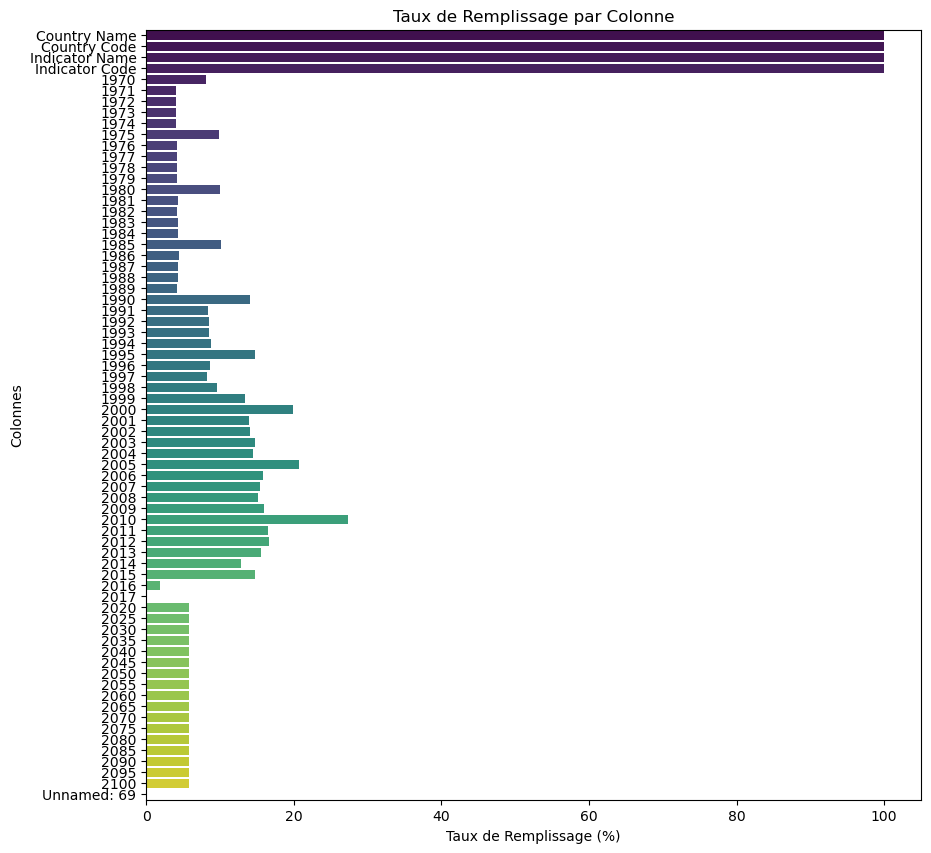

In [8]:
import seaborn as sns
taux_remplissage = (1 - data5.isnull().mean()) * 100
plt.figure(figsize=(10, 10))
sns.barplot(x=taux_remplissage, y=taux_remplissage.index, palette="viridis")
plt.title("Taux de Remplissage par Colonne")
plt.xlabel("Taux de Remplissage (%)")
plt.ylabel("Colonnes")
plt.show()

On peut voir claire que les années de 2016 jusu'à 2100 contient beaucoup de valeur manquantes, De plus, il est important de noter que l'utilisation d'Internet n'a véritablement pris de l'ampleur qu'à partir de l'année 2001. Par conséquent, nous concentrerons notre analyse sur les données disponibles à partir de cette période (2000-2015) pour des résultats plus pertinents.

In [9]:
data5=data5.drop(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000','2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],axis=1)
data5.reset_index(drop=True)

Country Name Country Code  \
0        Arab World          ARB   
1        Arab World          ARB   
2        Arab World          ARB   
3        Arab World          ARB   
4        Arab World          ARB   
...             ...          ...   
886925     Zimbabwe          ZWE   
886926     Zimbabwe          ZWE   
886927     Zimbabwe          ZWE   
886928     Zimbabwe          ZWE   
886929     Zimbabwe          ZWE   

                                           Indicator Name  \
0       Adjusted net enrolment rate, lower secondary, ...   
1       Adjusted net enrolment rate, lower secondary, ...   
2       Adjusted net enrolment rate, lower secondary, ...   
3       Adjusted net enrolment rate, lower secondary, ...   
4       Adjusted net enrolment rate, primary, both sex...   
...                                                   ...   
886925  Youth illiterate population, 15-24 years, male...   
886926  Youth literacy rate, population 15-24 years, b...   
886927  Youth literacy rate, population 15-24 years, f...   
886928  Youth literacy rate, population 15-24 years, g...   
886929  Youth literacy rate, population 15-24 years, m...   

              Indicator Code       2001       2002       2003       2004  \
0                 UIS.NERA.2        NaN        NaN        NaN        NaN   
1               UIS.NERA.2.F        NaN        NaN        NaN        NaN   
2             UIS.NERA.2.GPI        NaN        NaN        NaN        NaN   
3               UIS.NERA.2.M        NaN        NaN        NaN        NaN   
4                SE.PRM.TENR  78.800522  80.051399  80.805389  81.607063   
...                      ...        ...        ...        ...        ...   
886925      UIS.LP.AG15T24.M        NaN        NaN        NaN        NaN   
886926     SE.ADT.1524.LT.ZS        NaN        NaN        NaN        NaN   
886927  SE.ADT.1524.LT.FE.ZS        NaN        NaN        NaN        NaN   
886928  SE.ADT.1524.LT.FM.ZS        NaN        NaN        NaN        NaN   
886929  SE.ADT.1524.LT.MA.ZS        NaN        NaN        NaN        NaN   

             2005       2006       2007       2008       2009       2010  \
0             NaN        NaN        NaN        NaN        NaN        NaN   
1             NaN        NaN        NaN        NaN        NaN        NaN   
2             NaN        NaN        NaN        NaN        NaN        NaN   
3             NaN        NaN        NaN        NaN        NaN        NaN   
4       82.489487  82.685509  83.280342  84.011871  84.195961  85.211998   
...           ...        ...        ...        ...        ...        ...   
886925        NaN        NaN        NaN        NaN        NaN        NaN   
886926        NaN        NaN        NaN        NaN        NaN        NaN   
886927        NaN        NaN        NaN        NaN        NaN        NaN   
886928        NaN        NaN        NaN        NaN        NaN        NaN   
886929        NaN        NaN        NaN        NaN        NaN        NaN   

                2011       2012      2013           2014  2015  
0                NaN        NaN       NaN            NaN   NaN  
1                NaN        NaN       NaN            NaN   NaN  
2                NaN        NaN       NaN            NaN   NaN  
3                NaN        NaN       NaN            NaN   NaN  
4           85.24514  86.101669  85.51194      85.320152   NaN  
...              ...        ...       ...            ...   ...  
886925  166679.00000        NaN       NaN  199464.000000   NaN  
886926      90.93070        NaN       NaN      90.428120   NaN  
886927      92.12456        NaN       NaN      93.188350   NaN  
886928       1.02828        NaN       NaN       1.063890   NaN  
886929      89.59058        NaN       NaN      87.591860   NaN  

[886930 rows x 19 columns]

### Choix des indicateurs

**Je souhaite d'abord choisir les indicateurs avant d'entamer le processus de nettoyage des données, afin d'évaluer quels indicateurs sont correctement renseignés pour chaque pays.**

In [47]:
data=data5.copy()
indicateur_counts = data.groupby(['Indicator Name','Indicator Code'])['Country Name'].count().reset_index()
indicateur_counts= indicateur_counts.sort_values(by='Country Name', ascending=False)
#pd.set_option('display.max_rows', None)
indicateur_counts.head(10)

Indicator Name  \
0     Adjusted net enrolment rate, lower secondary, both sexes (%)   
2435                                Population, ages 10-18, female   
2437                                 Population, ages 10-18, total   
2438                                Population, ages 11-15, female   
2439                                  Population, ages 11-15, male   
2440                                 Population, ages 11-15, total   
2441                                Population, ages 11-16, female   
2442                                  Population, ages 11-16, male   
2443                                 Population, ages 11-16, total   
2444                                Population, ages 11-17, female   

         Indicator Code  Country Name  
0            UIS.NERA.2           242  
2435  SP.POP.1018.FE.UN           242  
2437  SP.POP.1018.TO.UN           242  
2438  SP.POP.1115.FE.UN           242  
2439  SP.POP.1115.MA.UN           242  
2440  SP.POP.1115.TO.UN           242  
2441  SP.POP.1116.FE.UN           242  
2442  SP.POP.1116.MA.UN           242  
2443  SP.POP.1116.TO.UN           242  
2444  SP.POP.1117.FE.UN           242

**Étant donné que notre école en ligne s'adresse aux lycéens et aux étudiants universitaires, nous utilisons des mots-clés spécifiques tels que "secondaire", "université", "école privée" pour identifier les indicateurs pertinents. Il est essentiel d'obtenir une perspective sur l'économie des pays et, étant une école en ligne, nous attachons également de l'importance aux statistiques liées à Internet, entre autres.**

In [52]:
data=data5.copy()
data_secondary = data[data['Indicator Name'].str.contains('lower secondary', case=False)]
indicateur_counts2 = data_secondary.groupby(['Indicator Name','Indicator Code'])['Country Name'].count().reset_index()
indicateur_counts2= indicateur_counts2.sort_values(by='Country Name', ascending=False)
indicateur_counts2.head(20)

Indicator Name  \
0                              Adjusted net enrolment rate, lower secondary, both sexes (%)   
223                                     UIS: Net attendance rate, lower secondary, male (%)   
243                    UIS: Net attendance rate, lower secondary, second quintile, male (%)   
242   UIS: Net attendance rate, lower secondary, second quintile, gender parity index (GPI)   
241                  UIS: Net attendance rate, lower secondary, second quintile, female (%)   
240              UIS: Net attendance rate, lower secondary, second quintile, both sexes (%)   
239                              UIS: Net attendance rate, lower secondary, rural, male (%)   
238             UIS: Net attendance rate, lower secondary, rural, gender parity index (GPI)   
237                            UIS: Net attendance rate, lower secondary, rural, female (%)   
236                        UIS: Net attendance rate, lower secondary, rural, both sexes (%)   
235                   UIS: Net attendance rate, lower secondary, richest quintile, male (%)   
234  UIS: Net attendance rate, lower secondary, richest quintile, gender parity index (GPI)   
233                 UIS: Net attendance rate, lower secondary, richest quintile, female (%)   
232             UIS: Net attendance rate, lower secondary, richest quintile, both sexes (%)   
231                   UIS: Net attendance rate, lower secondary, poorest quintile, male (%)   
230  UIS: Net attendance rate, lower secondary, poorest quintile, gender parity index (GPI)   
229                 UIS: Net attendance rate, lower secondary, poorest quintile, female (%)   
228             UIS: Net attendance rate, lower secondary, poorest quintile, both sexes (%)   
227                    UIS: Net attendance rate, lower secondary, middle quintile, male (%)   
226   UIS: Net attendance rate, lower secondary, middle quintile, gender parity index (GPI)   

        Indicator Code  Country Name  
0           UIS.NERA.2           242  
223        UIS.NAR.2.M           242  
243     UIS.NAR.2.Q2.M           242  
242   UIS.NAR.2.Q2.GPI           242  
241     UIS.NAR.2.Q2.F           242  
240       UIS.NAR.2.Q2           242  
239    UIS.NAR.2.RUR.M           242  
238  UIS.NAR.2.RUR.GPI           242  
237    UIS.NAR.2.RUR.F           242  
236      UIS.NAR.2.RUR           242  
235     UIS.NAR.2.Q5.M           242  
234   UIS.NAR.2.Q5.GPI           242  
233     UIS.NAR.2.Q5.F           242  
232       UIS.NAR.2.Q5           242  
231     UIS.NAR.2.Q1.M           242  
230   UIS.NAR.2.Q1.GPI           242  
229     UIS.NAR.2.Q1.F           242  
228       UIS.NAR.2.Q1           242  
227     UIS.NAR.2.Q3.M           242  
226   UIS.NAR.2.Q3.GPI           242

In [53]:
data=data5.copy()
data_secondary_u = data[data['Indicator Name'].str.contains('upper secondary', case=False)]
indicateur_counts3 = data_secondary_u.groupby(['Indicator Name','Indicator Code'])['Country Name'].count().reset_index()
indicateur_counts3= indicateur_counts3.sort_values(by='Country Name', ascending=False)
indicateur_counts3.head(20)

Indicator Name  \
0                                                                           Adjusted net enrolment rate, upper secondary, both sexes (%)   
84                     UIS: Percentage of population age 25+ with at least completed upper secondary education (ISCED 3 or higher). Male   
98   Wittgenstein Projection: Percentage of the population age 20-39 by highest level of educational attainment. Upper Secondary. Female   
97    Wittgenstein Projection: Percentage of the population age 20-24 by highest level of educational attainment. Upper Secondary. Total   
96     Wittgenstein Projection: Percentage of the population age 20-24 by highest level of educational attainment. Upper Secondary. Male   
95   Wittgenstein Projection: Percentage of the population age 20-24 by highest level of educational attainment. Upper Secondary. Female   
94    Wittgenstein Projection: Percentage of the population age 15-19 by highest level of educational attainment. Upper Secondary. Total   
93     Wittgenstein Projection: Percentage of the population age 15-19 by highest level of educational attainment. Upper Secondary. Male   
92   Wittgenstein Projection: Percentage of the population age 15-19 by highest level of educational attainment. Upper Secondary. Female   
91      Wittgenstein Projection: Percentage of the population age 15+ by highest level of educational attainment. Upper Secondary. Total   
90       Wittgenstein Projection: Percentage of the population age 15+ by highest level of educational attainment. Upper Secondary. Male   
89     Wittgenstein Projection: Percentage of the population age 15+ by highest level of educational attainment. Upper Secondary. Female   
88                                                 UIS: Percentage of population age 25+ with completed upper secondary education. Total   
87                                                  UIS: Percentage of population age 25+ with completed upper secondary education. Male   
86                                                UIS: Percentage of population age 25+ with completed upper secondary education. Female   
85                    UIS: Percentage of population age 25+ with at least completed upper secondary education (ISCED 3 or higher). Total   
83      UIS: Percentage of population age 25+ with at least completed upper secondary education (ISCED 3 or higher). Gender Parity Index   
100   Wittgenstein Projection: Percentage of the population age 20-39 by highest level of educational attainment. Upper Secondary. Total   
82                   UIS: Percentage of population age 25+ with at least completed upper secondary education (ISCED 3 or higher). Female   
81                                                                             Theoretical duration of upper secondary education (years)   

             Indicator Code  Country Name  
0                UIS.NERA.3           242  
84     UIS.EA.3T6.AG25T99.M           242  
98        PRJ.ATT.2039.3.FE           242  
97        PRJ.ATT.2024.3.MF           242  
96        PRJ.ATT.2024.3.MA           242  
95        PRJ.ATT.2024.3.FE           242  
94        PRJ.ATT.1519.3.MF           242  
93        PRJ.ATT.1519.3.MA           242  
92        PRJ.ATT.1519.3.FE           242  
91        PRJ.ATT.15UP.3.MF           242  
90        PRJ.ATT.15UP.3.MA           242  
89        PRJ.ATT.15UP.3.FE           242  
88         UIS.EA.3.AG25T99           242  
87       UIS.EA.3.AG25T99.M           242  
86       UIS.EA.3.AG25T99.F           242  
85       UIS.EA.3T6.AG25T99           242  
83   UIS.EA.3T6.AG25T99.GPI           242  
100       PRJ.ATT.2039.3.MF           242  
82     UIS.EA.3T6.AG25T99.F           242  
81           SE.SEC.DURS.UP           242

In [58]:
data=data5.copy()
data_internet = data[data['Indicator Name'].str.contains('internet', case=False)]
indicateur_counts5 = data_internet.groupby(['Indicator Name','Indicator Code'])['Country Name'].count().reset_index()
indicateur_counts5= indicateur_counts5.sort_values(by='Country Name', ascending=False)
indicateur_counts5.head(20)

Indicator Name  Indicator Code  Country Name
0  Internet users (per 100 people)  IT.NET.USER.P2           242

In [60]:
data=data5.copy()
data_computer = data[data['Indicator Name'].str.contains('computer', case=False)]
indicateur_counts6 = data_computer.groupby(['Indicator Name','Indicator Code'])['Country Name'].count().reset_index()
indicateur_counts6= indicateur_counts6.sort_values(by='Country Name', ascending=False)
indicateur_counts6.head(20)

Indicator Name  \
0                                     PIAAC: Adults by proficiency level in problem solving in technology-rich environments (%). No computer experience   
1                     PIAAC: Adults by proficiency level in problem solving in technology-rich environments (%). Opted out of computer-based assessment   
2  PIAAC: Female adults by proficiency level in problem solving in technology-rich environments (%). No computer experience or failed the ICT core test   
3    PIAAC: Male adults by proficiency level in problem solving in technology-rich environments (%). No computer experience or failed the ICT core test   
4   PIAAC: Young adults by proficiency level in problem solving in technology-rich environments (%). No computer experience or failed the ICT core test   
5               PIAAC: Young adults by proficiency level in problem solving in technology-rich environments (%). Opted out of computer-based assessment   
6                                                                                                                   Personal computers (per 100 people)   

            Indicator Code  Country Name  
0          LO.PIAAC.TEC.NO           242  
1         LO.PIAAC.TEC.OPT           242  
2   LO.PIAAC.TEC.FE.FAILNO           242  
3   LO.PIAAC.TEC.MA.FAILNO           242  
4  LO.PIAAC.TEC.YOU.FAILNO           242  
5     LO.PIAAC.TEC.YOU.OPT           242  
6           IT.CMP.PCMP.P2           242

In [62]:
data=data5.copy()
data_computer = data[data['Indicator Name'].str.contains('Population growth', case=False)]
indicateur_counts7 = data_computer.groupby(['Indicator Name','Indicator Code'])['Country Name'].count().reset_index()
indicateur_counts7= indicateur_counts7.sort_values(by='Country Name', ascending=False)
indicateur_counts7.head(20)

Indicator Name Indicator Code  Country Name
0  Population growth (annual %)    SP.POP.GROW           242

**Aprés une exploration globale des différents indicateurs et d'une recherche sur les indicateurs qui sont renseignée pour plusieurs pays. Dans le contexte de notre ambition d'expansion à l'échelle mondiale pour notre école en ligne destinée aux lycées et universités, nous observons que certains indicateurs revêtent une importance stratégique supérieure par rapport aux autres. Ces indicateurs jouent un rôle clé dans notre démarche d'expansion et de réussite à l'échelle internationale ces indicateurs sont:**  
**Utilisation d'internet: IT.NET.USER.P2    
**Effectifs en enseignement secondaire et universitaire: SE.SEC.ENRL,SE.TER.ENRL   
**Revenu moyen du pays: NY.GDP.PCAP.PP.CD    
**Population, population Growth: SP.POP.1524.TO.UN, SP.POP.GROW

### Regroupement des données

#### Filtrage

In [10]:
data=data5.copy()

In [11]:
dfInternet_users=data.loc[data['Indicator Code'].str.contains('(?=.*IT.NET.USER.P2)',case=False, regex=True)]

In [12]:
data_PIB=data.loc[data['Indicator Code'].str.contains('(?=.*NY.GDP.PCAP.PP.CD)',case=False, regex=True)]

In [13]:
data_inscription_secondaire=data.loc[data['Indicator Code'].str.contains(r'^SE\.SEC\.ENRL$', case=False, regex=True)]
data_inscription_université=data.loc[data['Indicator Code'].str.contains(r'^SE\.TER\.ENRL$', case=False, regex=True)]

In [14]:
data_population=data.loc[data['Indicator Code'].str.contains('(?=.*SP.POP.1524.TO.UN)',case=False, regex=True)]
data_population_growth=data.loc[data['Indicator Code'].str.contains(r'^SP\.POP\.GROW$',case=False, regex=True)]

#### Visualisation de chaque indicateur

##### Taux de remplissage

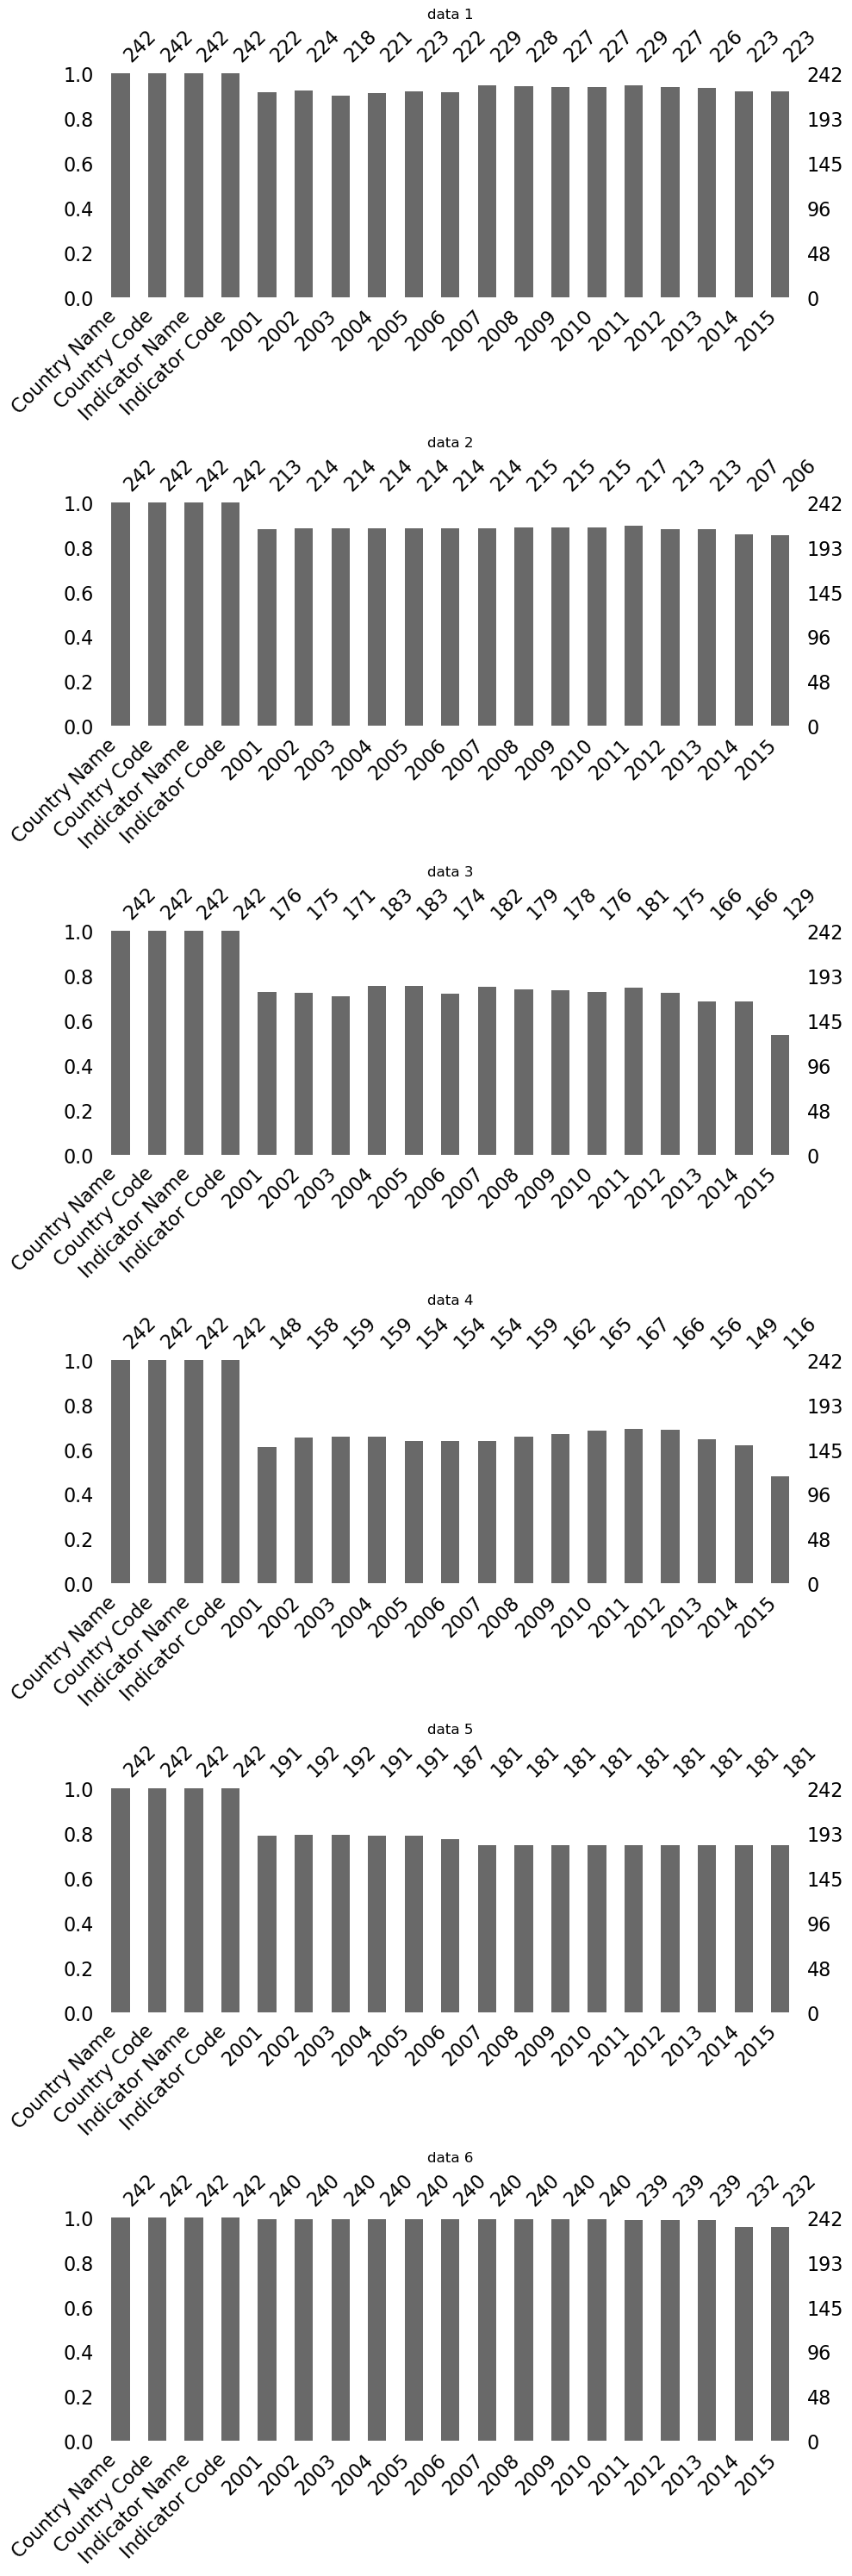

In [15]:
listdaframe = [dfInternet_users, data_PIB, data_inscription_secondaire, data_inscription_université, data_population, data_population_growth]

fig, axes = plt.subplots(len(listdaframe), 1, figsize=(10, 5 * len(listdaframe)))

for i, data in enumerate(listdaframe):
    ax =axes[i]
    msno.bar(data, ax=ax)
    ax.set_title(f'data {i+1}')

plt.tight_layout()  
plt.show()

** On peut constater que nos indicateurs contient des valeurs manquantes mais ils sont moins de 50%,donc de point de vue taux de remplissage on peut utliser ces uindicateurs pour notre etude.

##### Valeurs Abberantes

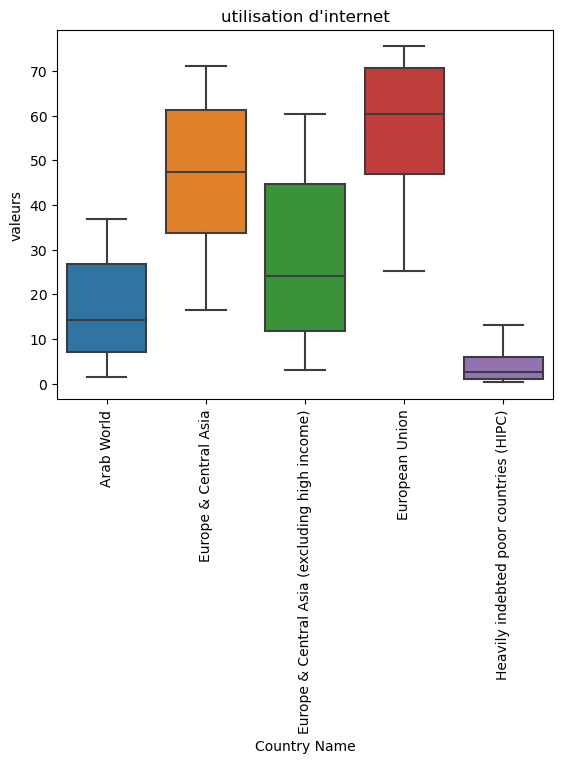

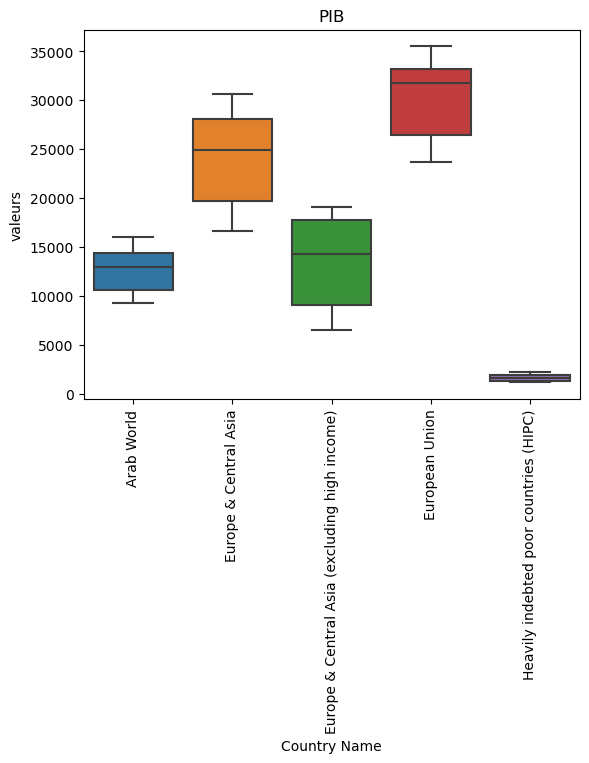

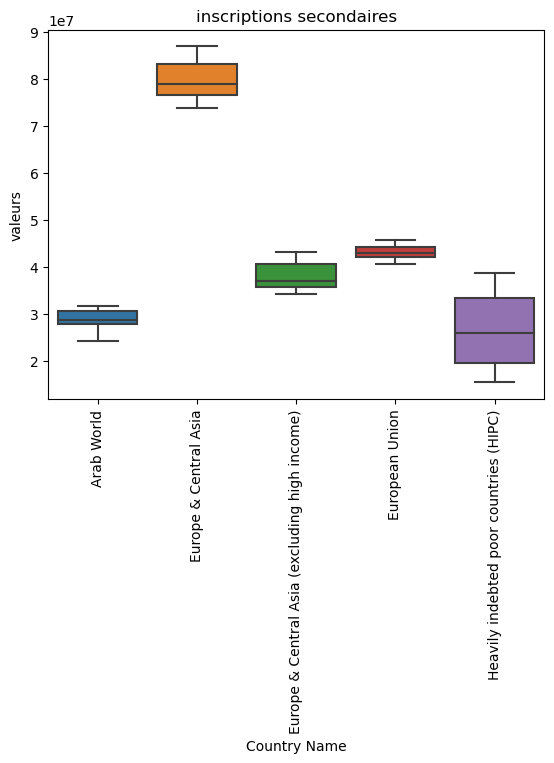

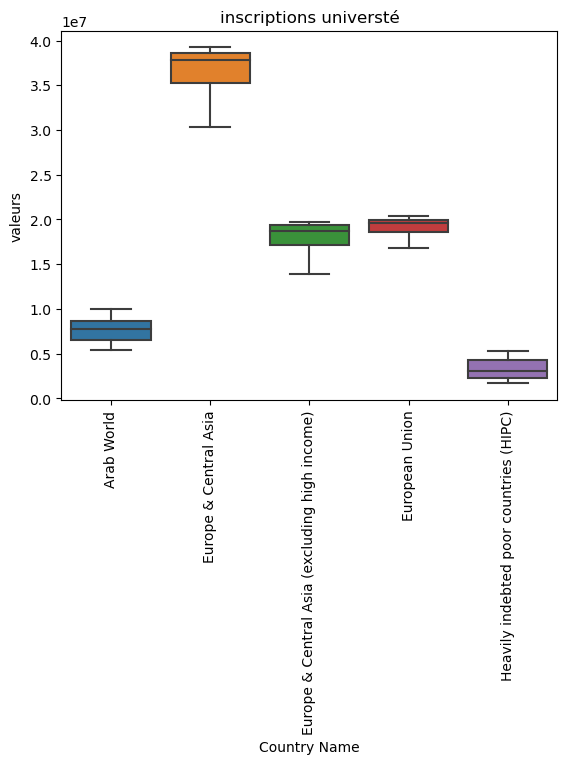

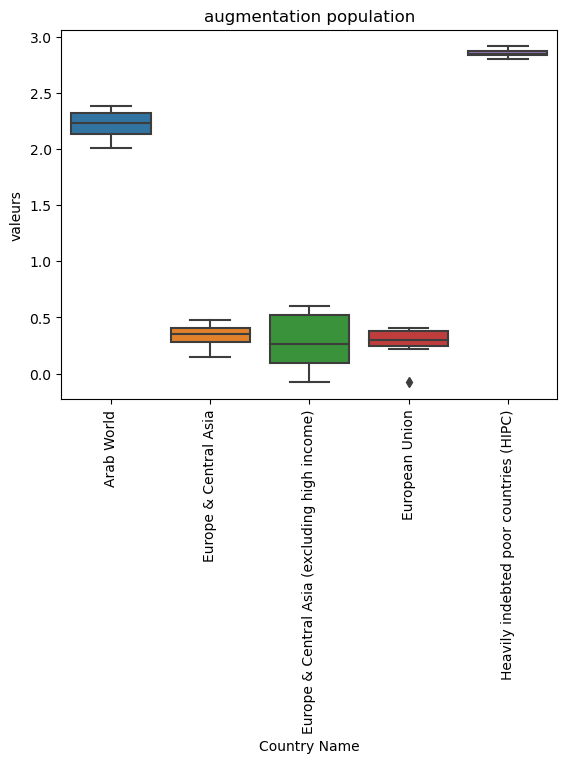

In [17]:
import seaborn as sns
listdaframe = [dfInternet_users, data_PIB, data_inscription_secondaire, data_inscription_université, data_population_growth]
titres_des_graphes = ["utilisation d'internet","PIB","inscriptions secondaires","inscriptions universté","augmentation population"]
for i, data in enumerate(listdaframe):
    data1=data.drop(columns=['Country Code','Indicator Name','Indicator Code'],axis=1)
    data1.set_index('Country Name', inplace=True)
    data1=data1.loc[['Arab World','Europe & Central Asia','Europe & Central Asia (excluding high income)', 'European Union','Heavily indebted poor countries (HIPC)']]
    data1=data1.T
    sns.boxplot(data=data1)
    plt.title(titres_des_graphes[i])
    plt.ylabel("valeurs")
    plt.xticks(rotation=90) 
    plt.show()

A partir des graphes on peut voir que les quatres premieres graphes ne contient pas des valeurs abberantes,alors le graphe augmentation population contient une valeur abberante.

##### Regroupement

In [18]:
data_indicateur_total = pd.concat([dfInternet_users, data_inscription_secondaire, data_inscription_université,data_population,data_population_growth,data_PIB], ignore_index=True)

##### Valeurs Manquantes

In [22]:
data_indicateur_total.isnull().sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
2001              262
2002              249
2003              258
2004              244
2005              247
2006              261
2007              252
2008              250
2009              249
2010              248
2011              238
2012              251
2013              271
2014              294
2015              365
dtype: int64

In [23]:
data_imputation = data_indicateur_total.fillna(method='ffill', axis=1)

In [134]:
data_imputation.isnull().sum()

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
2001              0
2002              0
2003              0
2004              0
2005              0
2006              0
2007              0
2008              0
2009              0
2010              0
2011              0
2012              0
2013              0
2014              0
2015              0
dtype: int64

#### visualisation des indicateur par région

In [25]:
data_indicateur_region=data_imputation.loc[data_imputation['Country Code'].str.contains('(?=.*ARB|EAS|EAP|ECS|ECA|EUU|LCN|LAC|MEA|MNA|NAC|SAS|SSF|SSA)',case=False, regex=True)]

In [28]:
#GDP
indices_data_gdp= data_indicateur_region[data_indicateur_region['Indicator Name'] =='GDP per capita, PPP (current international $)'].index
data_gdp1=data_indicateur_region.loc[indices_data_gdp]
data_gdp=data_gdp1.sort_values(by = '2015', ascending =False)
data_gdp= (data_gdp.reset_index(drop=True))

indices_data_inter= data_indicateur_region[data_indicateur_region['Indicator Name'] =='Internet users (per 100 people)'].index
data_inter1=data_indicateur_region.loc[indices_data_inter]
data_inter=data_inter1.sort_values(by = '2015', ascending =False)
data_inter= (data_inter.reset_index(drop=True))

indices_data_sec= data_indicateur_region[data_indicateur_region['Indicator Name'] =='Enrolment in secondary education, both sexes (number)'].index
data_sec1=data_indicateur_region.loc[indices_data_sec]
data_sec=data_sec1.sort_values(by = '2015', ascending =False)
data_sec= (data_sec.reset_index(drop=True))

indices_data_ter= data_indicateur_region[data_indicateur_region['Indicator Name'] =='Enrolment in tertiary education, all programmes, both sexes (number)'].index
data_ter1=data_indicateur_region.loc[indices_data_ter]
data_ter=data_ter1.sort_values(by = '2015', ascending =False)
data_ter= (data_ter.reset_index(drop=True))

indices_data_pop= data_indicateur_region[data_indicateur_region['Indicator Name'] =='Population growth (annual %)'].index
data_pop1=data_indicateur_region.loc[indices_data_pop]
data_pop=data_pop1.sort_values(by = '2015', ascending =False)
data_pop= (data_pop.reset_index(drop=True))

In [31]:
titre_graphes=['PIB','utilisateurs_internet','inscription_lycée','inscription_université','pop augmentation']
listregion=[data_gdp1,data_inter1,data_sec1,data_ter1,data_pop1]

for i, dat in enumerate(listregion):
    dat=dat.drop(columns=['Country Code','Indicator Name','Indicator Code'],axis=1)
    dat.set_index('Country Name', inplace=True) 
    #dat=dat.iloc[:,4:]
    dat=dat.T
    fig = px.line(dat, color='Country Name', title=titre_graphes[i])
    fig.update_layout( legend=dict(font=dict(size=10), x=1.05, y=1.05),xaxis_title="Année", yaxis_title="Valeur")
    fig.show()

Dans cette analyse, nous avons représenté l'évolution de chaque indicateur au fil du temps. Il est intéressant de noter que, pour l'utilisation d'Internet, la région de l'Amérique du Nord occupe la première place, tout comme pour le PIB. En revanche, en ce qui concerne l'inscription au lycée et à l'université, c'est la région de l'Asie de l'Est et du Pacifique qui se distingue, tandis que la croissance de la population est plus marquée en Afrique subsaharienne.

**Pour comparer les indicateurs par région, on a tracé un graphe qui englobe toutes les indicateurs et région en se basons sur la derniere année**

In [32]:
scaler = MinMaxScaler()
data_gdp['2015'] = scaler.fit_transform(data_gdp[['2015']])
data_inter['2015'] = scaler.fit_transform(data_inter[['2015']])
data_sec['2015'] = scaler.fit_transform(data_sec[['2015']])
data_ter['2015'] = scaler.fit_transform(data_ter[['2015']])
data_pop['2015'] = scaler.fit_transform(data_pop[['2015']])

In [34]:
graphe0 = go.Bar(
    x = data_gdp['Country Name'],
    y = data_gdp['2015'],
    name = "PIB",
    marker = dict(color = 'rgba(255, 26, 26, 0.5)',
                    line=dict(color='rgb(100,100,100)',width=2)))

graphe1 = go.Bar(
    x = data_gdp['Country Name'],
    y = data_inter['2015'],
    name = "utilisation d'unternet",
    marker = dict(color = 'rgba(255, 255, 51, 0.5)',
                line=dict(color='rgb(100,100,100)',width=2)))

graphe2 = go.Bar(
    x = data_gdp['Country Name'],
    y = data_sec['2015'],
    name = "inscription au lycée",
    marker = dict(color = 'rgba(77, 77, 255, 0.5)',
                    line=dict(color='rgb(100,100,100)',width=2)))

graphe3 = go.Bar(
    x = data_gdp['Country Name'],
    y = data_ter['2015'],
    name = "inscription au université",
    marker = dict(color = 'rgba(114, 204, 114, 255)',
                    line=dict(color='rgb(100,100,100)',width=2)))

graphe4 = go.Bar(
    x = data_gdp['Country Name'],
    y = data_pop['2015'],
    name = "augmentation population",
    marker = dict(color = 'rgba(67, 57, 111, 255)',
                    line=dict(color='rgb(100,100,100)',width=2)))

data = [graphe0, graphe1, graphe2, graphe3,graphe4]

layout = go.Layout(barmode = "group")

fig = go.Figure(data = data,layout = layout)

iplot(fig)

Nous nous appuyons sur les statistiques de l'année 2015, et d'après le graphique, il est clair que les pays les mieux classés pour notre étude se trouvent en Amérique du Nord et dans l'Union européenne.

#### Visualisation des indicateurs par pays

In [138]:
#Supression des données de région
indices2 =['Arab World', 'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)', 'European Union',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Middle East & North Africa',
       'Middle East & North Africa (excluding high income)',
       'North America','Euro area', 'High income', 'Middle income', 'OECD members',
       'Upper middle income', 'World','Heavily indebted poor countries (HIPC)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle income',
       'South Asia', 'Sub-Saharan Africa',
       'Sub-Saharan Africa (excluding high income)']
data_pays=data_indicateur_total.copy()
data_pays= data_pays[~data_pays['Country Name'].isin(indices2)]

In [139]:
#data_pays[['Country Name','Indicator Code','2010']].groupby(['Country Name','Indicator Code']).count().head(30)

In [140]:
#PIB
indices_GDP_pays= data_pays[data_pays['Indicator Name'] =='GDP per capita, PPP (current international $)'].index
data_GDP_pays1=data_pays.loc[indices_GDP_pays]
data_GDP_pays=data_GDP_pays1.sort_values(by = '2015', ascending =False)
data_GDP_pays= data_GDP_pays.reset_index(drop=True)

In [141]:
data_GDP_pays=data_GDP_pays.drop(['Country Code','Indicator Name','Indicator Code'],axis=1)
data_GDP_pays.set_index('Country Name',inplace=True)
data_GDP_pays_20=data_GDP_pays.head(30)

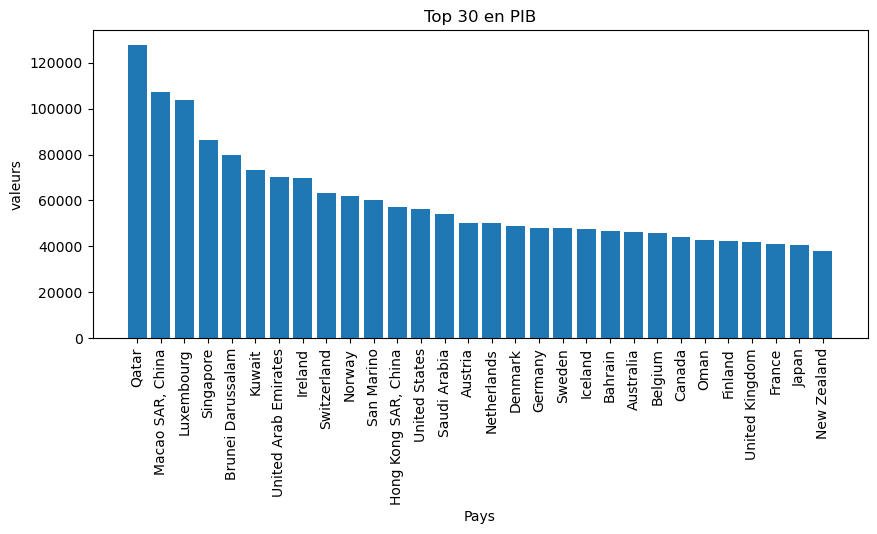

In [131]:
plt.bar(data_GDP_pays_20.index, data_GDP_pays_20['2015'])
plt.title("Top 30 en PIB")
plt.xlabel("Pays")
plt.ylabel("valeurs")
plt.xticks(rotation=90) 
fig = plt.gcf()
fig.set_size_inches(10, 4)
plt.show()

In [68]:
data_GDP_pays_dernier=data_GDP_pays1.sort_values(by = '2015', ascending =True)
data_GDP_pays_dernier.set_index('Country Name',inplace=True)
data_GDP_pays_20_dernier=data_GDP_pays_dernier.head(30)

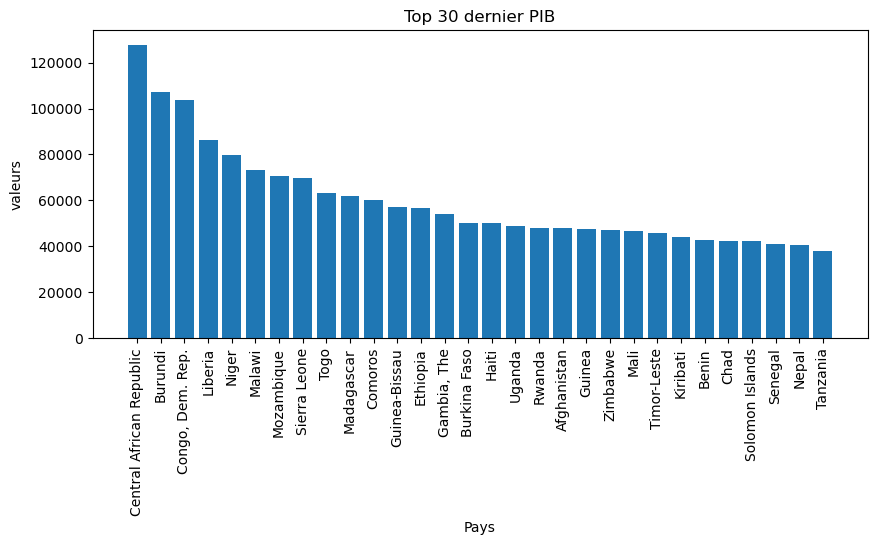

In [130]:
plt.bar(data_GDP_pays_20_dernier.index, data_GDP_pays_20['2015'])
plt.title("Top 30 dernier PIB")
plt.xlabel("Pays")
plt.ylabel("valeurs")
plt.xticks(rotation=90) 
fig = plt.gcf()
fig.set_size_inches(10, 4)
plt.show()

In [70]:
indices_dinternet_pays= data_pays[data_pays['Indicator Name'] =='Internet users (per 100 people)'].index
data_internet_pays1=data_pays.loc[indices_dinternet_pays]
data_internet_pays=data_internet_pays1.sort_values(by = '2015', ascending =False)
data_internet_pays= data_internet_pays.reset_index(drop=True)

In [71]:
data_internet_pays=data_internet_pays.drop(['Country Code','Indicator Name','Indicator Code'],axis=1)
data_internet_pays.set_index('Country Name',inplace=True)
data_internet_pays_20=data_internet_pays.head(30)

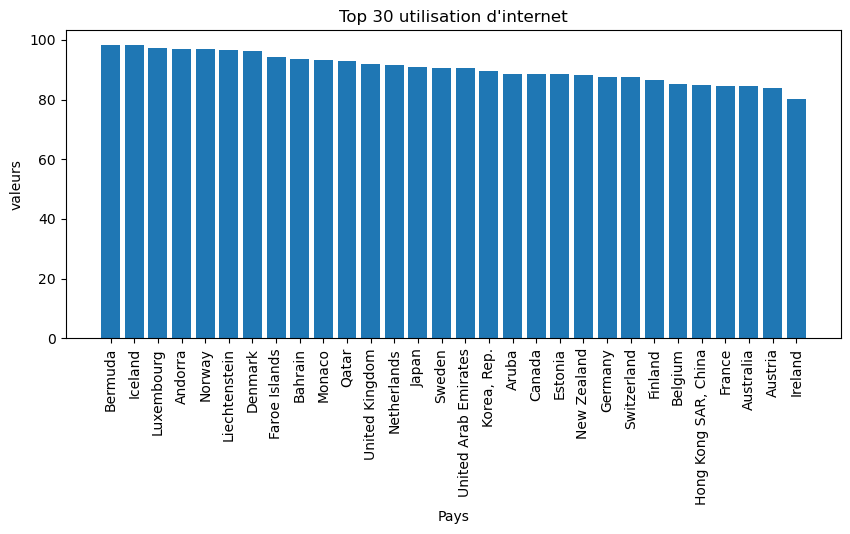

In [128]:
plt.bar(data_internet_pays_20.index, data_internet_pays_20['2015'])
plt.title("Top 30 utilisation d'internet")
plt.xlabel("Pays")
plt.ylabel("valeurs")
plt.xticks(rotation=90) 
fig = plt.gcf()
fig.set_size_inches(10, 4)
plt.show()

In [82]:
data_inter_pays_dernier=data_internet_pays1.sort_values(by = '2015', ascending =True)
data_inter_pays_dernier.set_index('Country Name',inplace=True)
data_inter_pays_dernier=data_inter_pays_dernier.head(30)

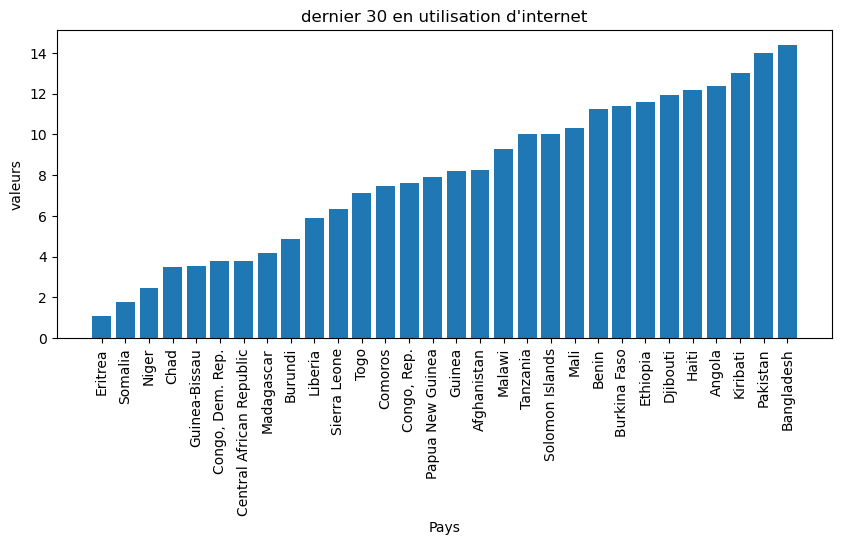

In [127]:
plt.bar(data_inter_pays_dernier.index, data_inter_pays_dernier['2015'])
plt.title("dernier 30 en utilisation d'internet")
plt.xlabel("Pays")
plt.ylabel("valeurs")
plt.xticks(rotation=90) 
fig = plt.gcf()
fig.set_size_inches(10, 4)
plt.show()

In [90]:
#secondaire
indices_sec_pays= data_pays[data_pays['Indicator Name'] =='Enrolment in secondary education, both sexes (number)'].index
data_sec_pays1=data_pays.loc[indices_sec_pays]
data_sec_pays=data_sec_pays1.sort_values(by = '2015', ascending =False)
data_sec_pays= data_sec_pays.reset_index(drop=True)

In [91]:
data_sec_pays=data_sec_pays.drop(['Country Code','Indicator Name','Indicator Code'],axis=1)
data_sec_pays.set_index('Country Name',inplace=True)
data_sec_pays_20=data_sec_pays.head(30)

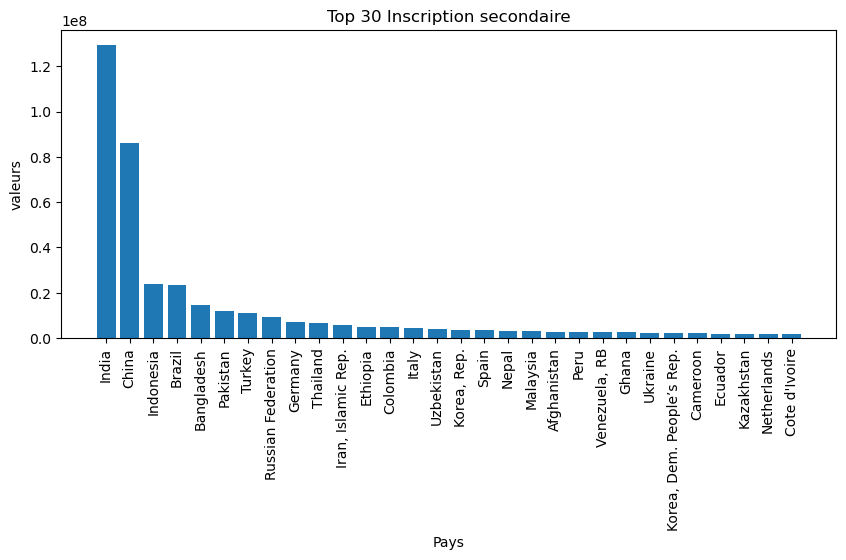

In [126]:
plt.bar(data_sec_pays_20.index, data_sec_pays_20['2015'])
plt.title("Top 30 Inscription secondaire")
plt.xlabel("Pays")
plt.ylabel("valeurs")
plt.xticks(rotation=90) 
fig = plt.gcf()
fig.set_size_inches(10, 4)
plt.show()

In [102]:
data_sec_pays_dernier=data_sec_pays1.sort_values(by ='2015',ascending =True)
data_sec_pays_dernier.set_index('Country Name',inplace=True)
data_sec_pays_dernier=data_sec_pays_dernier.head(30)

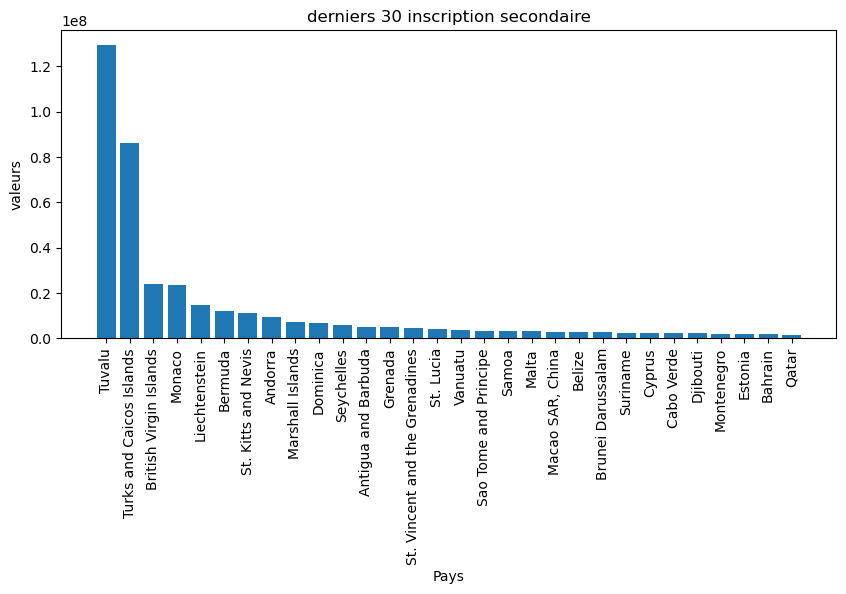

In [132]:
plt.bar(data_sec_pays_dernier.index, data_sec_pays_20['2015'])
plt.title("derniers 30 inscription secondaire")
plt.xlabel("Pays")
plt.ylabel("valeurs")
plt.xticks(rotation=90) 
fig = plt.gcf()
fig.set_size_inches(10, 4)
plt.show()

In [104]:
#Université
indices_ter_pays= data_pays[data_pays['Indicator Name'] =='Enrolment in tertiary education, all programmes, both sexes (number)'].index
data_ter_pays1=data_pays.loc[indices_sec_pays]
data_ter_pays=data_ter_pays1.sort_values(by ='2015', ascending =False)
data_ter_pays= data_ter_pays.reset_index(drop=True)

In [105]:
data_ter_pays=data_ter_pays.drop(['Country Code','Indicator Name','Indicator Code'],axis=1)
data_ter_pays.set_index('Country Name',inplace=True)
data_ter_pays_20=data_ter_pays.head(30)

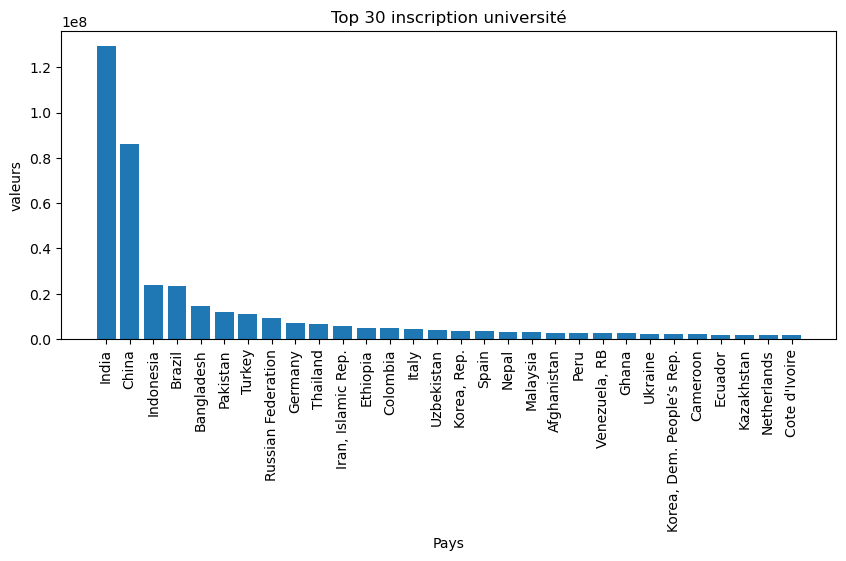

In [124]:
plt.bar(data_ter_pays_20.index, data_ter_pays_20['2015'])
plt.title("Top 30 inscription université")
plt.xlabel("Pays")
plt.ylabel("valeurs")
plt.xticks(rotation=90) 
fig = plt.gcf()
fig.set_size_inches(10, 4)
plt.show()

In [107]:
data_ter_pays_dernier=data_ter_pays1.sort_values(by ='2015',ascending =True)
data_ter_pays_dernier.set_index('Country Name',inplace=True)
data_ter_pays_dernier=data_ter_pays_dernier.head(30)

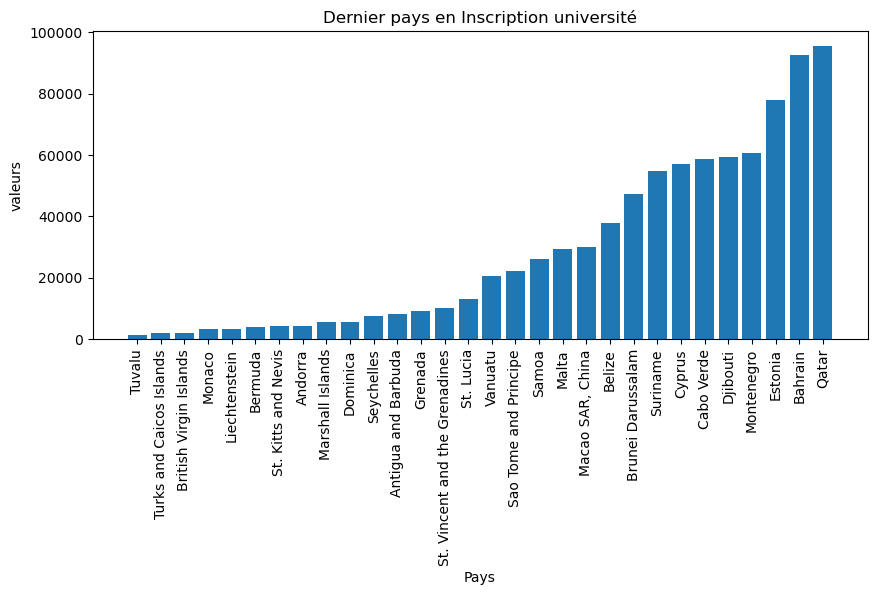

In [123]:
plt.bar(data_ter_pays_dernier.index, data_ter_pays_dernier['2015'])
plt.title("Dernier pays en Inscription université")
plt.xlabel("Pays")
plt.ylabel("valeurs")
plt.xticks(rotation=90) 
fig = plt.gcf()
fig.set_size_inches(10, 4)
plt.show()

In [109]:
#Pop1425
indices_pop_pays= data_pays[data_pays['Indicator Name'] =='Population, ages 15-24, total'].index
data_pop_pays1=data_pays.loc[indices_pop_pays]
data_pop_pays=data_pop_pays1.sort_values(by ='2015', ascending =False)
data_pop_pays= data_pop_pays.reset_index(drop=True)

In [110]:
data_pop_pays=data_pop_pays.drop(['Country Code','Indicator Name','Indicator Code'],axis=1)
data_pop_pays.set_index('Country Name',inplace=True)
data_pop_pays_20=data_pop_pays.head(30)

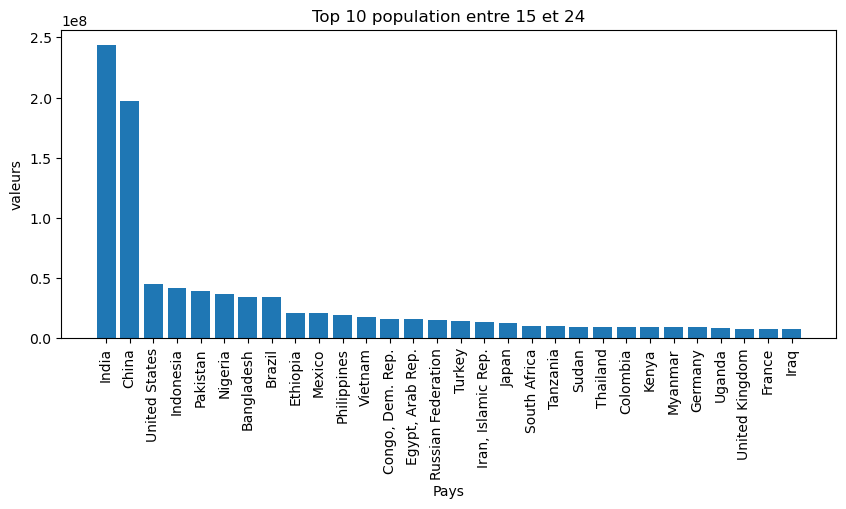

In [122]:
plt.bar(data_pop_pays_20.index, data_pop_pays_20['2015'])
plt.title("Top 10 population entre 15 et 24")
plt.xlabel("Pays")
plt.ylabel("valeurs")
plt.xticks(rotation=90) 
fig = plt.gcf()
fig.set_size_inches(10, 4)
plt.show()

In [112]:
data_pop_pays_dernier=data_pop_pays1.sort_values(by ='2015',ascending =True)
data_pop_pays_dernier.set_index('Country Name',inplace=True)
data_pop_pays_dernier=data_pop_pays_dernier.head(30)

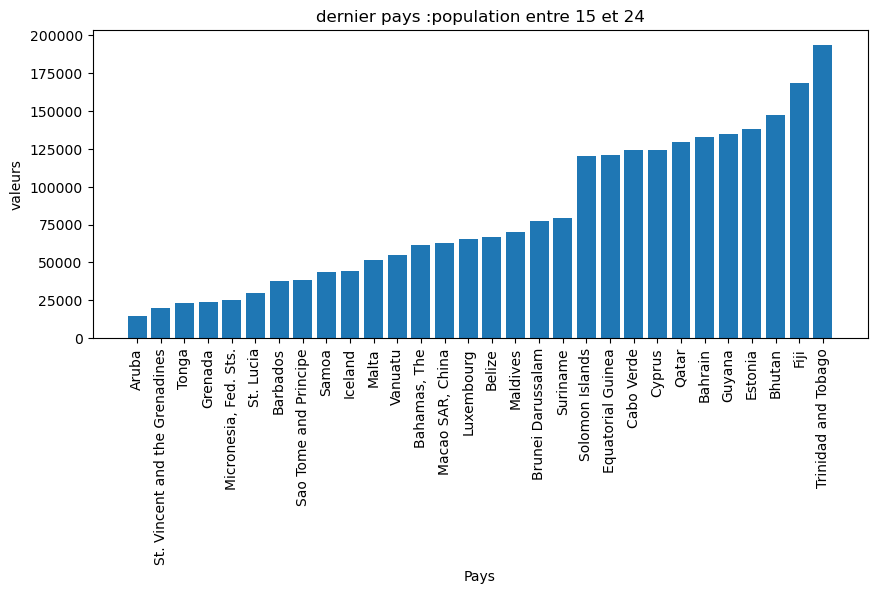

In [121]:
plt.bar(data_pop_pays_dernier.index, data_pop_pays_dernier['2015'])
plt.title("dernier pays :population entre 15 et 24")
plt.xlabel("Pays")
plt.ylabel("valeurs")
plt.xticks(rotation=90) 
fig = plt.gcf()
fig.set_size_inches(10, 4)
plt.show()

In [118]:
#Population growth
indices_pop_grow_pays= data_pays[data_pays['Indicator Name'] =='Population growth (annual %)'].index
data_pop__grow_pays1=data_pays.loc[indices_pop_grow_pays]
data_pop_pays_grow=data_pop__grow_pays1.sort_values(by ='2015', ascending =False)
data_pop_pays_grow= data_pop_pays_grow.reset_index(drop=True)

In [119]:
data_pop_pays_grow=data_pop_pays_grow.drop(['Country Code','Indicator Name','Indicator Code'],axis=1)
data_pop_pays_grow.set_index('Country Name',inplace=True)
data_pop_pays_grow_20=data_pop_pays.head(30)

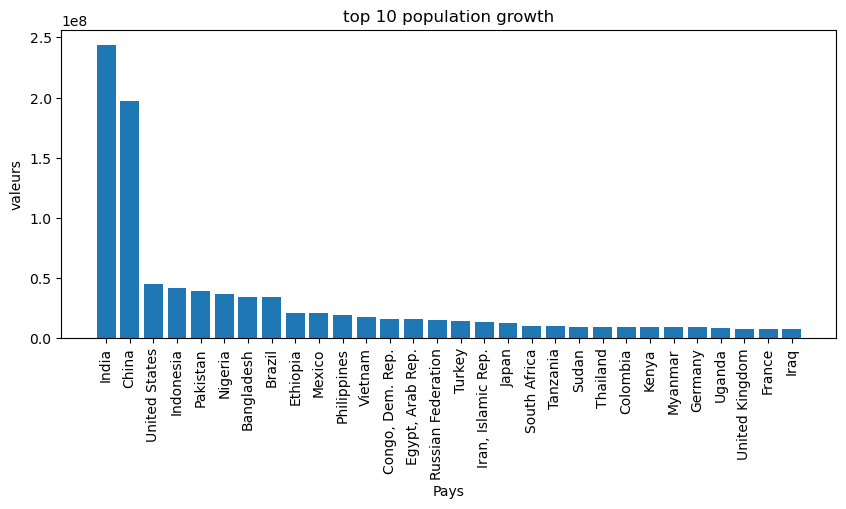

In [120]:
plt.bar(data_pop_pays_grow_20.index, data_pop_pays_grow_20['2015'])
plt.title("top 10 population growth")
plt.xlabel("Pays")
plt.ylabel("valeurs")
plt.xticks(rotation=90) 
fig = plt.gcf()
fig.set_size_inches(10, 4)
plt.show()

### Minimiser le nombre des pays

En utilisant la moyenne mondiale du PIB en 2015, qui est de 10175, nous allons définir que les pays dont la valeur est inférieure à cette moyenne sont considérés comme des pays à faible revenu.

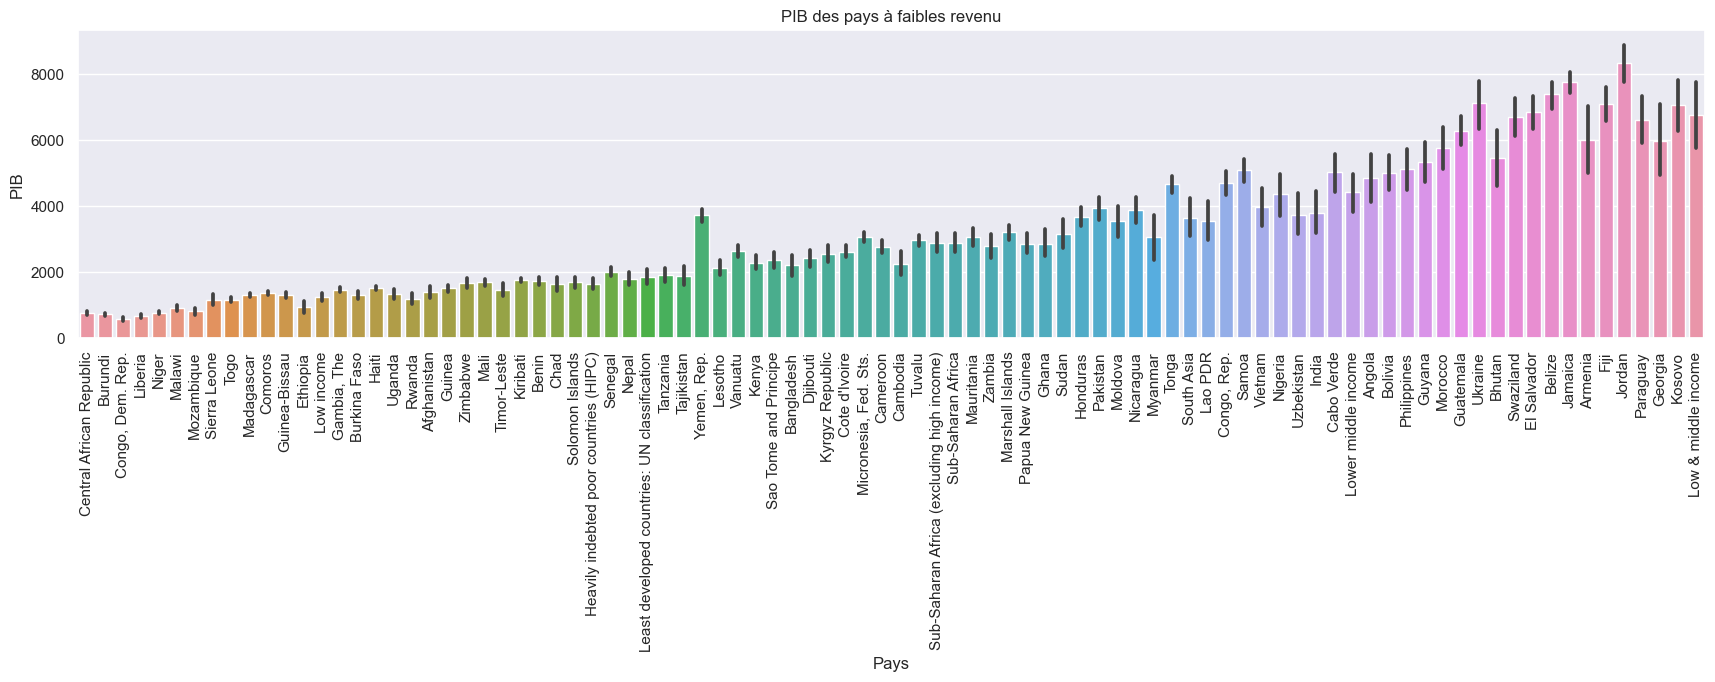

In [159]:
pays_faible_revenu = data_PIB[data_PIB['2015']<10175]
pays_faible_revenu=pays_faible_revenu.drop(['Country Code','Indicator Name','Indicator Code'],axis=1)
pays_faible_revenu.set_index('Country Name',inplace=True)
pays_faible_revenu=pays_faible_revenu.sort_values(by='2015',ascending=True)
df=pays_faible_revenu.T
sns.barplot(data=df)
sns.set(rc={'figure.figsize':(21,4)})
plt.title("PIB des pays à faibles revenu")
plt.xlabel("Pays")
plt.ylabel("PIB")
plt.xticks(rotation=90) 
plt.show()

In [161]:
data_pays = data_pays.loc[~((data_pays['Indicator Name'] == 'PIB') & (data_pays['2015'] < 10200))]

In [162]:
#Population 14à25
pop_1425_indices= data_pays[data_pays['Indicator Name'] =='Population, ages 15-24, total'].index
pop_1425=data_pays.loc[pop_1425_indices]
petit_population= pop_1425.sort_values(by='2015',ascending=True).head(60)
petit_population=petit_population.drop(['Country Code','Indicator Name','Indicator Code'],axis=1)
petit_population.set_index('Country Name',inplace=True)
petit_population=petit_population.T   

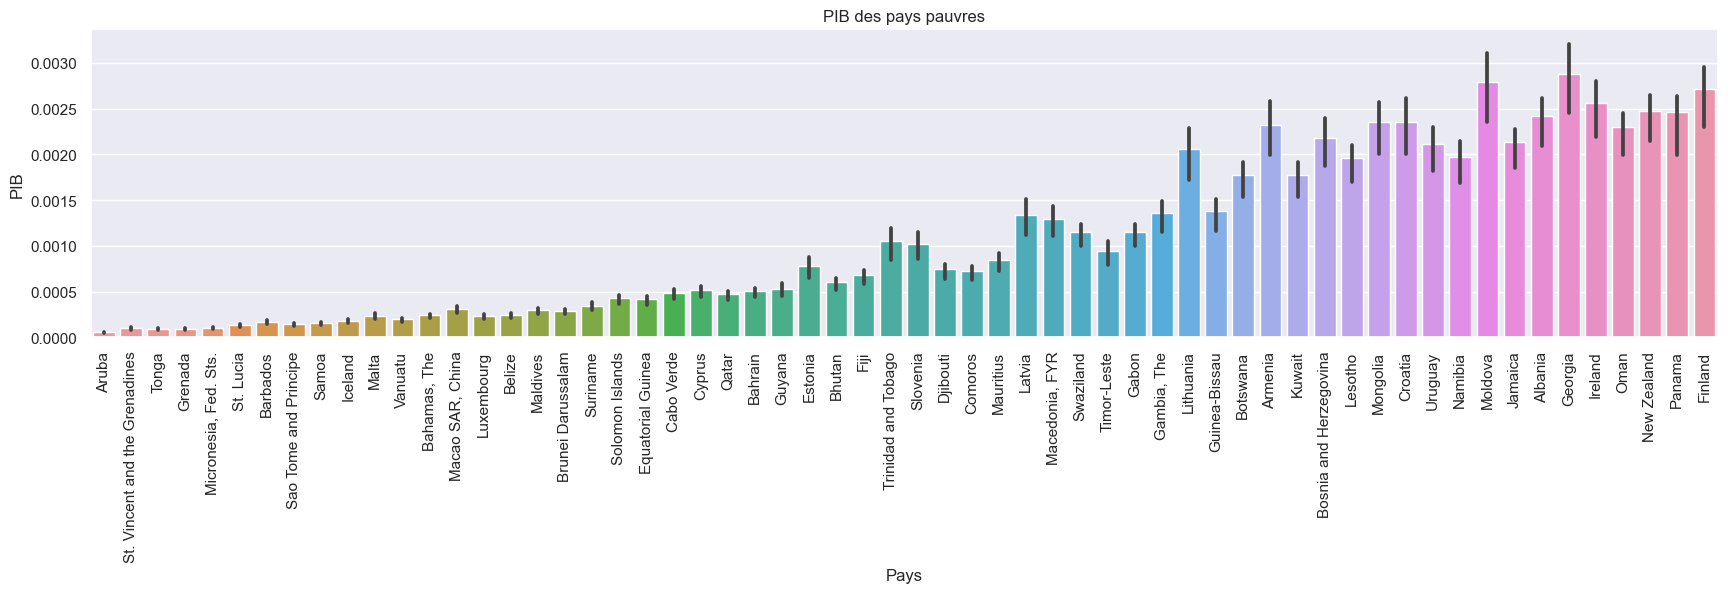

In [163]:
sns.barplot(data=petit_population)
sns.set(rc={'figure.figsize':(20,4)})
plt.title("PIB des pays pauvres")
plt.xlabel("Pays")
plt.ylabel("PIB")
plt.xticks(rotation=90) 
plt.show()

In [166]:
indices1=pop_1425.sort_values(by='2015',ascending=True).head(22)
data_pays= data_pays[~data_pays['Country Name'].isin(indices1)]

### Selection des pays

In [167]:
#Normaliser les données
numeric_columns = data_pays.select_dtypes(include=['number']).columns
scaler = MinMaxScaler()
data_pays[numeric_columns] = scaler.fit_transform(data_pays[numeric_columns])

In [202]:
#Méthode de pondération
score_internet = 1
score_gdp = 1
score_inscriptsec = 0.0002
score_inscriptter = 0.0002
score_pop = 0.0001
score_pop_growth=0.0001
data_pays['score'] = 0

for index, row in data_pays.iterrows():
    indicator_name = row['Indicator Name']
    values = row['2015']

    if indicator_name == 'Internet users (per 100 people)':
        data_pays.loc[index, 'score'] = values * score_internet
    elif indicator_name == 'Enrolment in secondary education, both sexes (number)':
        data_pays.loc[index, 'score'] = values * score_inscriptsec
    elif indicator_name == 'Enrolment in tertiary education, all programmes, both sexes (number)':
        data_pays.loc[index, 'score'] = values * score_inscriptter
    elif indicator_name == 'Population, ages 15-24, total':
        data_pays.loc[index, 'score'] = values * score_pop
    elif indicator_name == 'GDP per capita, PPP (current international $)':
        data_pays.loc[index, 'score'] = values * score_gdp
    elif indicator_name == 'Population growth (annual %)':
        data_pays.loc[index, 'score'] = values * score_pop_growth

In [203]:
df_Country=data_pays[['Country Name','score']]

In [205]:
df_Country_group=df_Country.groupby('Country Name')
result_df = df_Country_group['score'].sum().reset_index()

result_df = result_df.sort_values(by='score', ascending=False).reset_index(drop=True)
print("les 10 meilleurs pays")
result_df.head(10)

les 10 meilleurs pays


Country Name     score
0                 Qatar  0.000524
1      Macao SAR, China  0.000440
2            Luxembourg  0.000425
3             Singapore  0.000354
4     Brunei Darussalam  0.000326
5                Kuwait  0.000300
6  United Arab Emirates  0.000289
7               Ireland  0.000286
8         United States  0.000266
9           Switzerland  0.000261